<a id="1"></a>
# <p style="padding:10px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">ML_MODEL_ACCURACY</p>

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">IMPORTING LIBRARIES</p>

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">DATA EXPLORATION</p>

In [2]:
df = pd.read_excel('depression.xlsx')

In [3]:
df = df[:3000]

In [4]:
print(f"Shape of The Student  Dataset : {df.shape}")
print(f"\nGlimpse of The Dataset :")
df.head().style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

Shape of The Student  Dataset : (3000, 2)

Glimpse of The Dataset :


,text,label
0,oh my gosh,1.000000
1,"trouble sleeping, confused mind, restless heart. All out of tune",1.000000
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",1.000000
3,I've shifted my focus to something else but I'm still worried,1.000000
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",1.000000


In [5]:
df.label.value_counts()

0.0    2267
1.0     733
Name: label, dtype: int64

In [6]:
df = df.sample(frac = 1)

In [7]:
df.shape

(3000, 2)

In [ ]:
df.head().set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

In [9]:
df.isnull().sum()

text     7
label    0
dtype: int64

In [35]:
df.dropna()

,text,label,cleaned
338,even though I don't miss anyone but I'm still ...,1.0,even though miss anyone still restless
1983,"I'm looking at the advice again, it's really c...",0.0,looking advice really cool music really modern
2158,good morning world it's minchan monday,0.0,good morning world minchan monday
507,"Oh my God, I don't know why my heart is restle...",1.0,oh god know heart restless
1145,Okay done my brother,0.0,okay done brother
...,...,...,...
48,People who are restless and afraid can be seen...,1.0,people restless afraid seen frequent touching ...
965,Have you ever heard why but suddenly it's hila...,0.0,ever heard suddenly hilarious know stirred rea...
2205,I'm not in a good mood that's why I'm too lazy...,0.0,good mood lazy talk
417,"Just for Eid this year, I'm a little worried a...",1.0,eid year little worried template question peop...


C:\Users\shish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

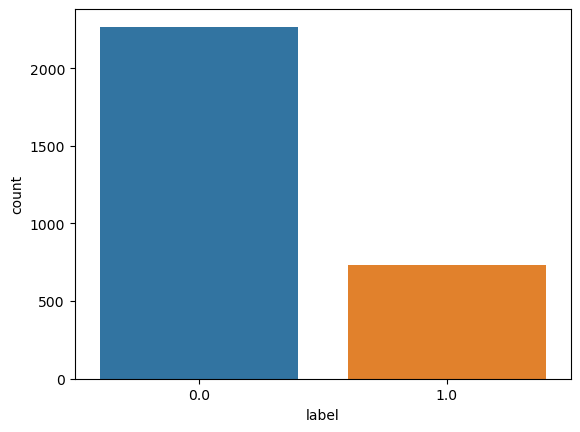

In [11]:
sns.countplot(df.label)

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
lm = WordNetLemmatizer()

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
pip install nltk

In [15]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shish\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [17]:
def text_transformation(col):
    corpus = []
    for token in col:
        alphabet = re.sub('[^a-zA-Z]',' ',str(token))
        alphabet = alphabet.lower()
        alphabet = alphabet.split()
        a_lemmas = [lm.lemmatize(word) for word in alphabet if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in a_lemmas))
    return corpus

In [18]:
df['cleaned'] = text_transformation(df.text)

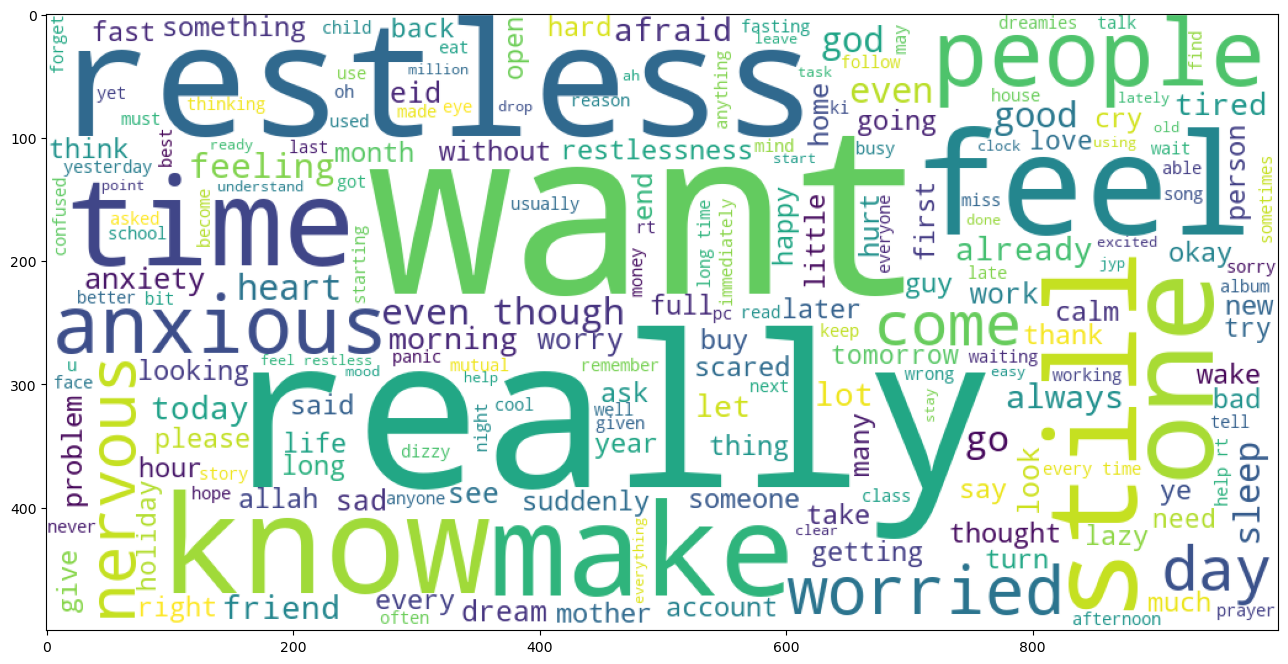

In [19]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">PERFORMANCE EVALUATION</p>

In [20]:
X = df.cleaned
y = df.label.astype(int)

In [21]:
vect = TfidfVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2),use_idf = True)

In [22]:
X_tfidf =vect.fit_transform(X).toarray()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,stratify = y,test_size = 0.2,random_state = 1)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


lr_model = LogisticRegression(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
mnb_model = MultinomialNB()
svm_model = SVC(class_weight='balanced')
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'SVM', 'KNN', 'AdaBoost']
ml_models = [lr_model,dt_model,rf_model,mnb_model, svm_model, knn_model, ada_model]

In [26]:
trained_ml_models = []
def model_train(model, train_data, train_labels):
    mf = model.fit(train_data,train_labels)
    trained_ml_models.append(mf)
# trained_ml_models = []
for i in ml_models:
    model_train(i,X_train, y_train)
#     trained_ml_models.append(tt)

In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

C:\Users\shish\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">PERFORMANCE MATRIX</p>

In [32]:
performance_matrix.style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,Precision,Recall,F1 Score
Logistic Regression,95.590000,95.500000,95.380000
Decision Tree,98.670000,98.670000,98.660000
Random Forest,97.550000,97.500000,97.460000
Naive Bayes,89.650000,88.000000,86.500000
SVM,92.930000,92.330000,91.840000
KNN,82.760000,77.670000,69.750000
AdaBoost,98.330000,98.330000,98.330000


In [29]:
data_matrix = pd.DataFrame({
    'Model':model_names,'Precision':pr_list,
                        'Recall':re_list,
                        'F1 Score':f1_list,
                      },
                    )

<a id="1"></a>
# <p style="padding:7px;background-color:Black;margin:0;color:white;font-family:newtimeroman;font-size:80%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">DATA MATRIX</p>

In [37]:
data_matrix.style.set_properties(**{"background-color": "#E5E4E2","color":"BLACK","border": "1.5px  solid black"})

,Model,Precision,Recall,F1 Score
0,Logistic Regression,95.590000,95.500000,95.380000
1,Decision Tree,98.670000,98.670000,98.660000
2,Random Forest,97.550000,97.500000,97.460000
3,Naive Bayes,89.650000,88.000000,86.500000
4,SVM,92.930000,92.330000,91.840000
5,KNN,82.760000,77.670000,69.750000
6,AdaBoost,98.330000,98.330000,98.330000


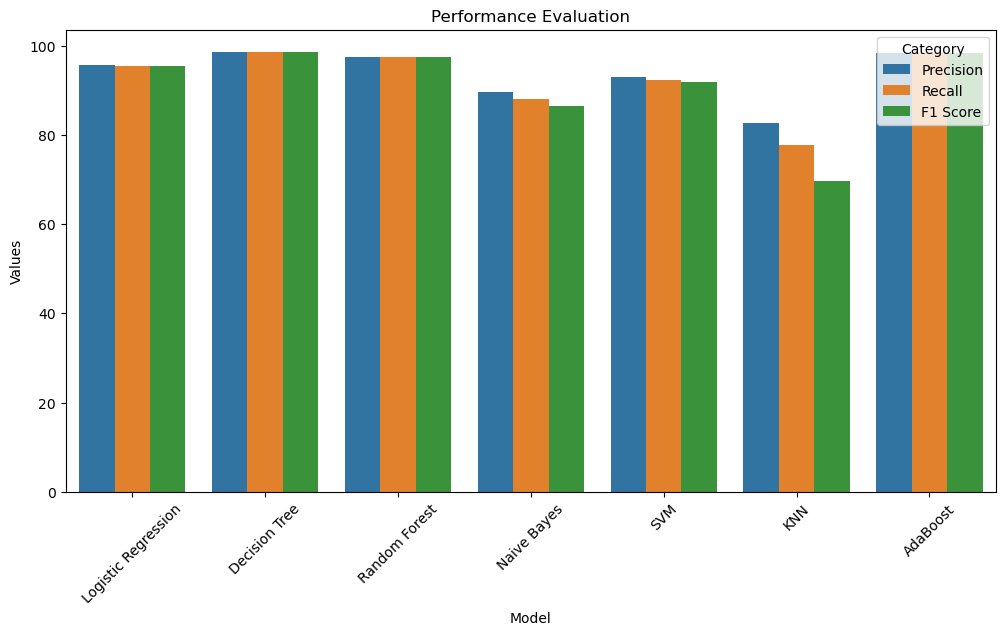

In [31]:
df_1 = pd.melt(data_matrix, id_vars="Model", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df_1,x='Model', y='Values' ,hue='Category')
ax.set_xlabel('Model') 
ax.set_title('Performance Evaluation')

ax.xaxis.set_ticklabels(model_names, rotation=45);
plt.show()